In [1]:
# installing worldbank data package of python
!pip install wbdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import wbdata as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wb.search_indicators('clean water')

id             name
-------------  ----------------------------------------------------------
SPI.D3.6.WTRS  GOAL 6: Clean Water and Sanitation (5 year moving average)

In [4]:
# The codes for making dataset
codes = {
    'AG.LND.FRST.ZS':'Forest area (% of land area)',
    'JI.POP.URBN.ZS':'Urban population, total (% of total population)',
    'EN.ATM.GHGT.KT.CE' : 'Total greenhouse gas emissions (kt of CO2 equivalent)',
    '4.1_SHARE.RE.IN.ELECTRICITY':'Renewable electricity (% in total electricity output)',
    'AG.LND.ARBL.HA':'Arable land (hectares)',

}
df = wb.get_dataframe(codes, country='all',convert_date=True)

# Cleaning and renaming the column
df = df.reset_index()
df = df.rename(columns={'country': 'Country', 'date': 'Year'})

# Saving the df
df.to_csv('df.csv', index=False)

In [5]:
df=pd.read_csv('/content/df.csv')

In [6]:
df=df.dropna()

In [25]:
df

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
47,Afghanistan,2007,1.852782,0.211654,17142.450,72.000000,7794000.0
51,Afghanistan,2011,1.852782,0.240437,29413.060,82.487562,7791000.0
53,Afghanistan,2013,1.852782,0.253802,27015.200,78.636408,7785000.0
231,Albania,2002,28.169854,0.415018,8750.980,93.953986,578000.0
232,Albania,2003,28.216460,0.438449,9087.252,97.856571,578000.0
...,...,...,...,...,...,...,...
17766,Zambia,2014,61.802392,0.488997,35417.200,97.163022,3800000.0
17767,Zambia,2015,61.549254,0.416920,36308.340,96.993824,3800000.0
17816,Zimbabwe,2001,47.356624,0.307433,31705.300,37.503162,3600000.0
17822,Zimbabwe,2007,46.642083,0.337467,26572.590,71.573137,4000000.0


In [9]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year.astype(str)

In [26]:
df_sorted = df.sort_values(by=['Urban population, total (% of total population)', 'Total greenhouse gas emissions (kt of CO2 equivalent)'], ascending=[False, False])

In [27]:
df_sorted

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
11552,Netherlands,1992,10.312915,96.411568,207000.40,1.287909,887000.0
11553,Netherlands,1993,10.354887,96.237332,212341.30,1.434700,887000.0
16914,United Kingdom,1999,12.137395,88.428366,683413.00,2.632717,5917000.0
16922,United Kingdom,2007,12.513950,84.614712,655184.10,5.010293,6085000.0
16916,United Kingdom,2001,12.253544,84.533614,694260.20,2.497332,5651000.0
...,...,...,...,...,...,...,...
16718,Uganda,1992,17.481437,0.094664,15310.54,99.441341,5040000.0
17294,"Venezuela, RB",2001,55.536988,0.073245,341783.60,67.067988,2598000.0
11492,Nepal,1995,40.044615,0.069512,23990.96,96.906355,2337200.0
4781,Estonia,1998,52.660816,0.000000,19073.87,0.187771,887000.0


## Netherlands has the most urban population area with high green house gas emissions

In [28]:
indicators_info=df.columns[1:]

In [29]:
indicators_info

Index(['Year', 'Forest area (% of land area)',
       'Urban population, total (% of total population)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Renewable electricity (% in total electricity output)',
       'Arable land (hectares)'],
      dtype='object')

In [30]:
countries = ['Australia', 'Belgium', 'Canada', 'Argentina', 'Denmark',
             'Ethiopia', 'Germany', 'India', 'Japan', 'Mexico',
             'Norway', 'Russia', 'South Africa', 'Thailand', 'United States']
df_countries = df_sorted[df_sorted['Country'].isin(countries)]

In [31]:
df_countries

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
712,Argentina,2015,10.632187,1.000000,370000.90,28.140069,36688100.0
710,Argentina,2013,10.795450,1.000000,364479.90,31.484491,39391300.0
711,Argentina,2014,10.713819,1.000000,363148.80,31.576204,38039700.0
709,Argentina,2012,10.877081,1.000000,355296.70,29.261135,39622900.0
705,Argentina,2008,11.271573,1.000000,354272.50,26.343706,35636300.0
...,...,...,...,...,...,...,...
4904,Ethiopia,1995,18.893500,0.150480,64808.29,93.516699,9940000.0
4914,Ethiopia,2005,16.093836,0.141939,89439.89,99.578207,12823000.0
4913,Ethiopia,2004,16.158554,0.141896,86140.76,99.291059,12364000.0
4909,Ethiopia,2000,18.528500,0.136479,72741.94,98.626045,10000000.0


In [32]:
%matplotlib inline
df_argentina=df[df['Country']=='Argentina']

In [33]:
df_argentina.head()

,Country,Year,Forest area (% of land area),"Urban population, total (% of total population)",Total greenhouse gas emissions (kt of CO2 equivalent),Renewable electricity (% in total electricity output),Arable land (hectares)
688,Argentina,1991,12.796992,1.0,251724.3,30.436566,26680000.0
689,Argentina,1992,12.730269,1.0,256243.3,34.870528,26785000.0
690,Argentina,1993,12.663546,1.0,256815.3,38.934000,26890000.0
691,Argentina,1994,12.596823,1.0,260198.3,42.601578,26998000.0
692,Argentina,1995,12.530100,1.0,262786.5,40.213385,27105000.0


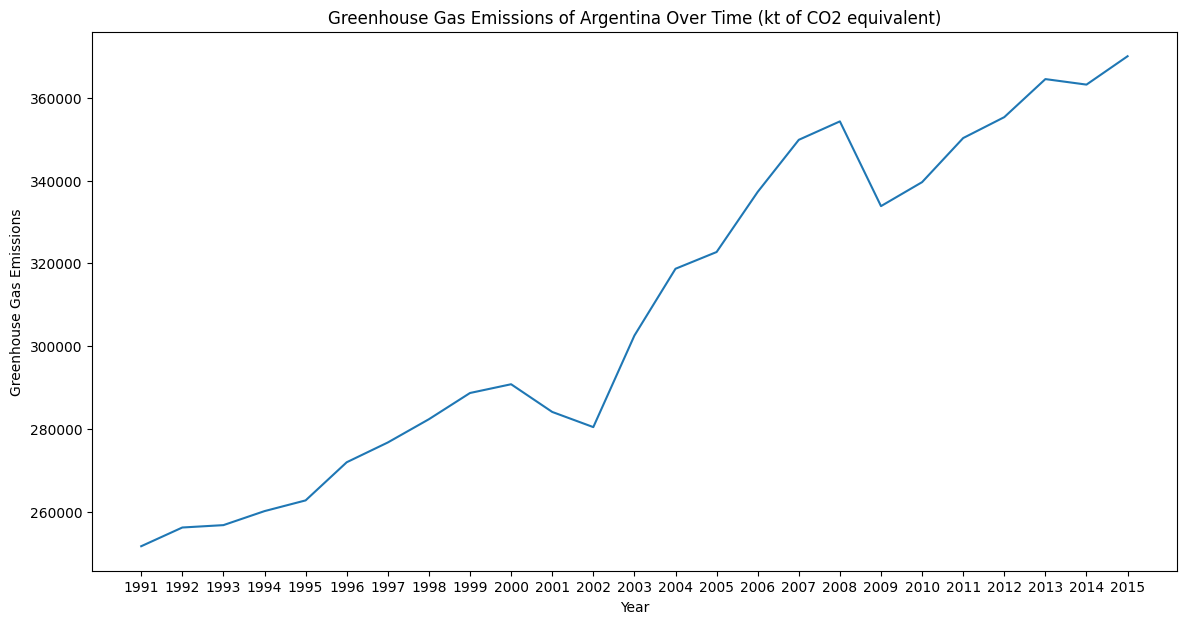

In [34]:

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_argentina['Year'], df_argentina['Total greenhouse gas emissions (kt of CO2 equivalent)'])
ax.set_title("Greenhouse Gas Emissions of Argentina Over Time (kt of CO2 equivalent)")
ax.set_xlabel("Year")
ax.set_ylabel("Greenhouse Gas Emissions")

plt.show()


<ipython-input-35-4b7af231542b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_countries.corr()


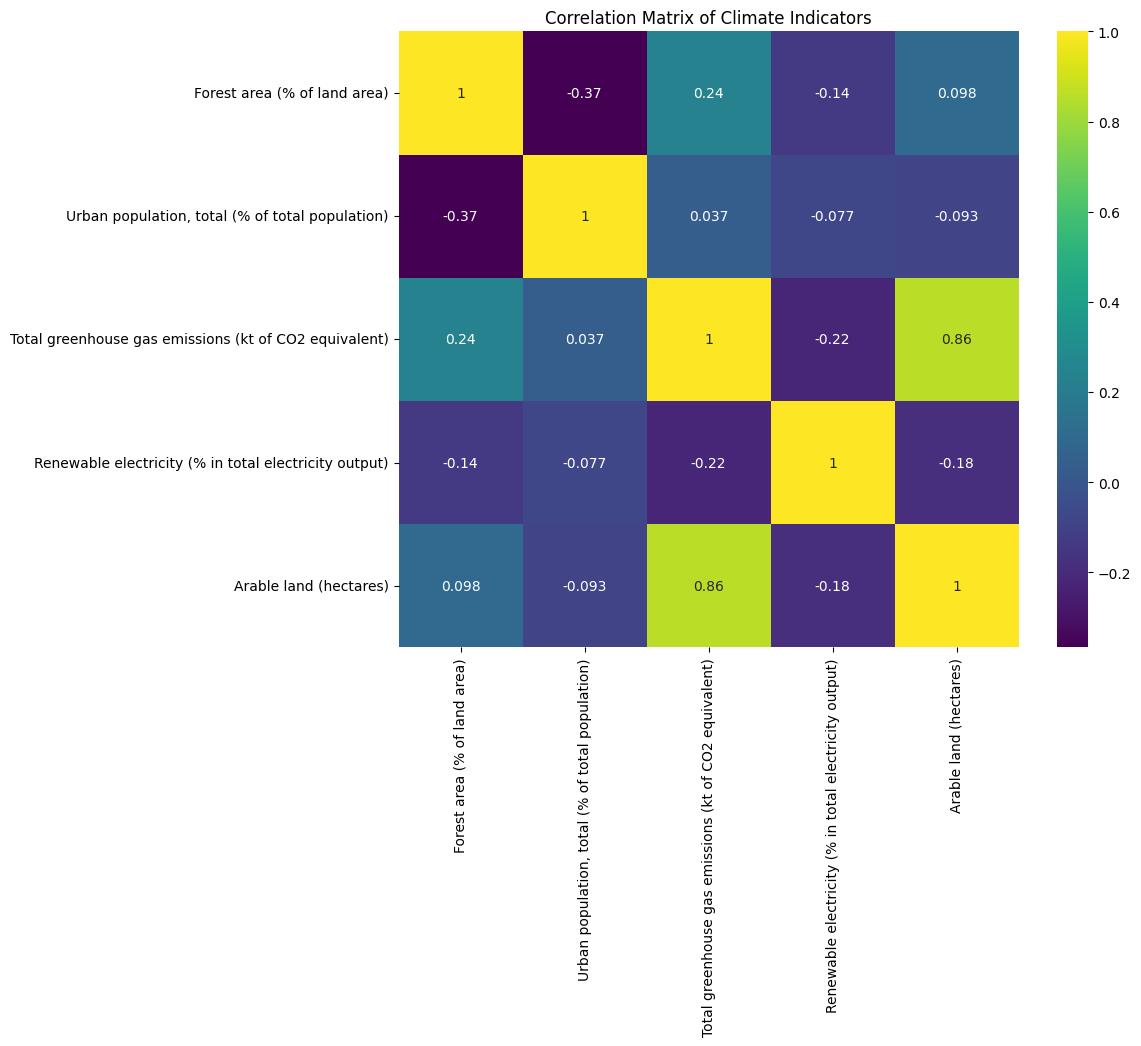

In [35]:

corr_matrix = df_countries.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', ax=ax)
ax.set_title('Correlation Matrix of Climate Indicators')

plt.show()

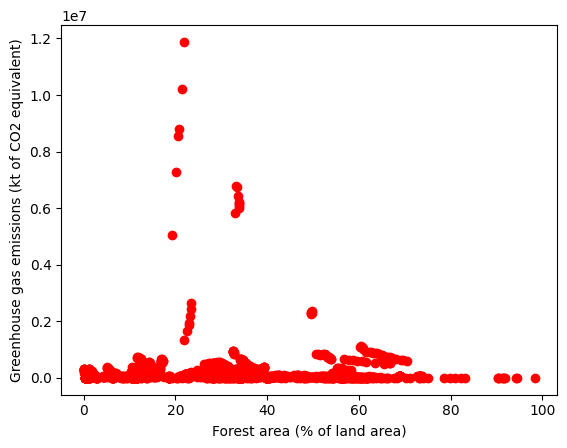

In [36]:
plt.scatter(df['Forest area (% of land area)'], df['Total greenhouse gas emissions (kt of CO2 equivalent)'], color='red')
plt.xlabel('Forest area (% of land area)')
plt.ylabel('Greenhouse gas emissions (kt of CO2 equivalent)')
plt.show()

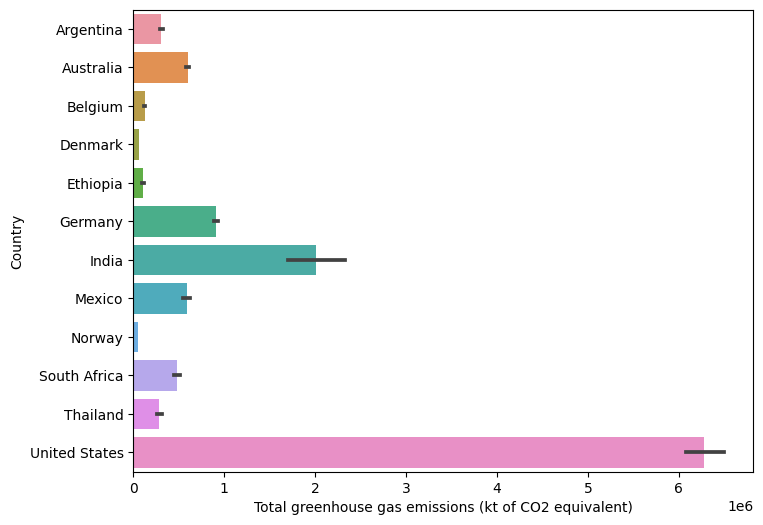

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='Total greenhouse gas emissions (kt of CO2 equivalent)', y='Country', data=df_countries)
plt.xlabel('Total greenhouse gas emissions (kt of CO2 equivalent)')
plt.ylabel('Country')
plt.show()


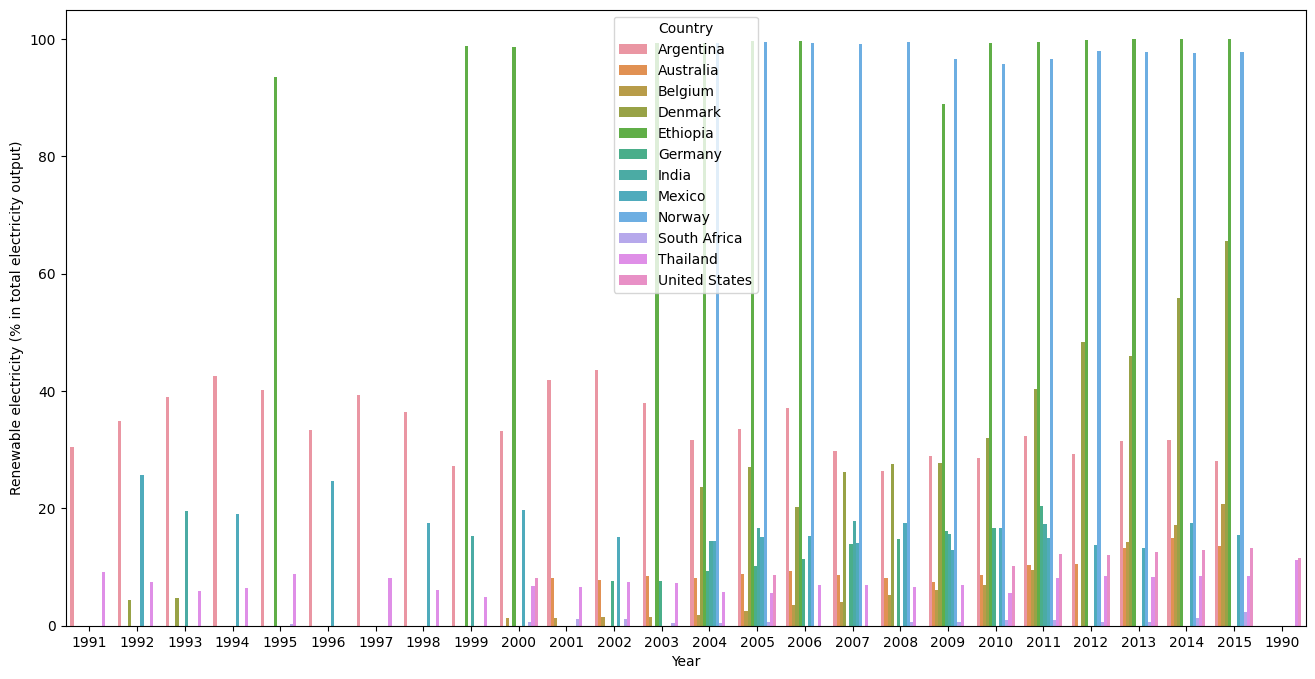

In [21]:
# select the countries and the renewable electricity column
countries = ['Australia', 'Belgium', 'Canada', 'Argentina', 'Denmark',
             'Ethiopia', 'Germany', 'India', 'Japan', 'Mexico',
             'Norway', 'Russia', 'South Africa', 'Thailand', 'United States']
plt.figure(figsize=(16,8))
# plot the data
sns.barplot(x='Year', y='Renewable electricity (% in total electricity output)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Renewable electricity (% in total electricity output)')
plt.show()


ascas

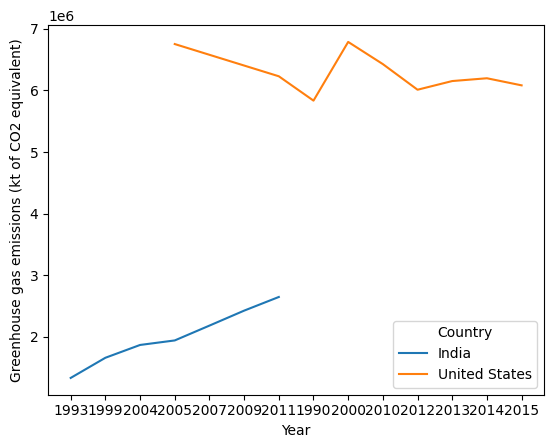

In [22]:


# select the countries and the greenhouse gas emissions column
countries = ['India', 'United States']
cols = ['Year', 'Country', 'Total greenhouse gas emissions (kt of CO2 equivalent)']
df_countries = df.loc[(df['Country'].isin(countries))]

# plot the data
sns.lineplot(x='Year', y='Total greenhouse gas emissions (kt of CO2 equivalent)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Greenhouse gas emissions (kt of CO2 equivalent)')
plt.show()


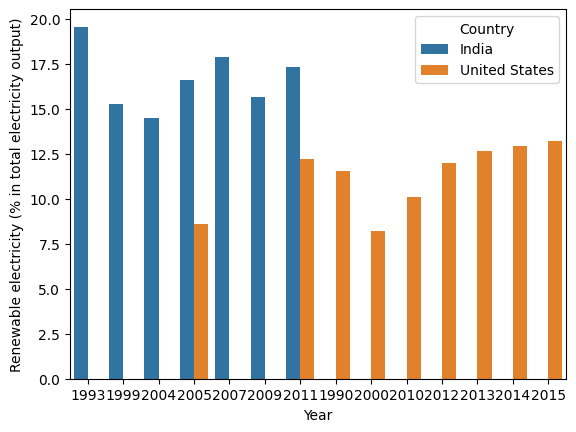

In [23]:
# select the countries and the renewable electricity column
cols = ['Year', 'Country', 'Renewable electricity (% in total electricity output)']
df_countries = df.loc[(df['Country'].isin(countries))]

# plot the data
sns.barplot(x='Year', y='Renewable electricity (% in total electricity output)', hue='Country', data=df_countries)
plt.xlabel('Year')
plt.ylabel('Renewable electricity (% in total electricity output)')
plt.show()
